In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("titanic.csv")

In [7]:
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [8]:
# Select relevant features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target = 'Survived'

df = data[features + [target]].copy()

In [9]:
# Handle missing values

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())


In [10]:
# Encode categorical variable 'Sex'
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [11]:
# Feature matrix X and target y
X = df[features].values
y = df[target].values.reshape(-1, 1)

In [12]:
# Normalize numeric features
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [13]:
# Split dataset into train and test (80-20 split)
np.random.seed(42)
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
split = int(0.8 * len(indices))

X_train, X_test = X[indices[:split]], X[indices[split:]]
y_train, y_test = y[indices[:split]], y[indices[split:]]

In [14]:
# 2. Logistic Regression Class
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        self.m, self.n = X.shape
        self.weights = np.zeros((self.n, 1))
        self.bias = 0
        self.losses = []

        for i in range(self.epochs):
            # Linear prediction
            z = np.dot(X, self.weights) + self.bias
            # Sigmoid activation
            y_pred = self.sigmoid(z)
            
            # Compute loss (binary cross-entropy)
            loss = - (1/self.m) * np.sum(y * np.log(y_pred + 1e-8) + (1 - y) * np.log(1 - y_pred + 1e-8))
            self.losses.append(loss)
            
            # Gradients
            dw = (1/self.m) * np.dot(X.T, (y_pred - y))
            db = (1/self.m) * np.sum(y_pred - y)
            
            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
            if i % 100 == 0:
                print(f"Epoch {i}: Loss = {loss:.4f}")
    
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(z)
        return np.where(y_pred >= 0.5, 1, 0)
    
    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.weights) + self.bias)

In [15]:
# 3. Train the model
# ==================================
model = LogisticRegressionScratch(learning_rate=0.05, epochs=2000)
model.fit(X_train, y_train)


Epoch 0: Loss = 0.6931
Epoch 100: Loss = 0.4863
Epoch 200: Loss = 0.4588
Epoch 300: Loss = 0.4510
Epoch 400: Loss = 0.4480
Epoch 500: Loss = 0.4467
Epoch 600: Loss = 0.4460
Epoch 700: Loss = 0.4457
Epoch 800: Loss = 0.4455
Epoch 900: Loss = 0.4453
Epoch 1000: Loss = 0.4453
Epoch 1100: Loss = 0.4452
Epoch 1200: Loss = 0.4452
Epoch 1300: Loss = 0.4452
Epoch 1400: Loss = 0.4452
Epoch 1500: Loss = 0.4452
Epoch 1600: Loss = 0.4452
Epoch 1700: Loss = 0.4452
Epoch 1800: Loss = 0.4452
Epoch 1900: Loss = 0.4452


In [16]:
# 4. Evaluate the model
# ==================================
y_pred = model.predict(X_test)

# Metrics
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def precision(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    return tp / (tp + fp + 1e-8)

def recall(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp / (tp + fn + 1e-8)

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * (p * r) / (p + r + 1e-8)

In [17]:
print("\nModel Performance:")
print(f"Accuracy:  {accuracy(y_test, y_pred):.4f}")
print(f"Precision: {precision(y_test, y_pred):.4f}")
print(f"Recall:    {recall(y_test, y_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")



Model Performance:
Accuracy:  0.7765
Precision: 0.6866
Recall:    0.7077
F1 Score:  0.6970


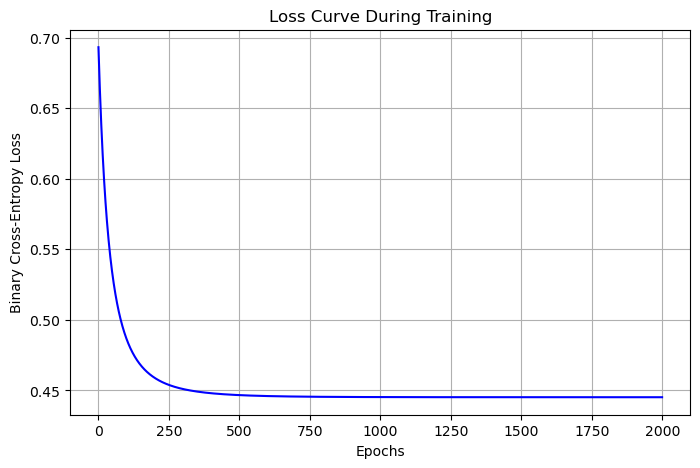

In [18]:
# 5. Visualizations
# ==================================
plt.figure(figsize=(8,5))
plt.plot(range(len(model.losses)), model.losses, color='blue')
plt.title("Loss Curve During Training")
plt.xlabel("Epochs")
plt.ylabel("Binary Cross-Entropy Loss")
plt.grid(True)
plt.show()

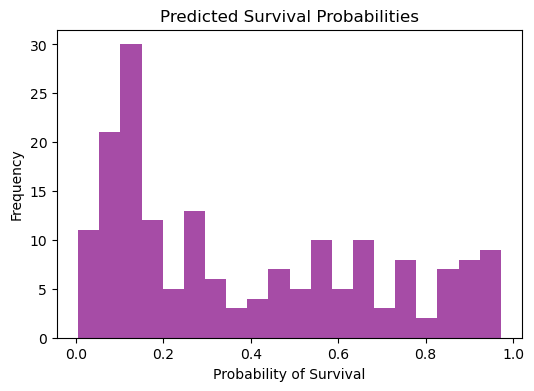

In [19]:
# Visualize predictions
plt.figure(figsize=(6,4))
plt.hist(model.predict_proba(X_test), bins=20, color='purple', alpha=0.7)
plt.title("Predicted Survival Probabilities")
plt.xlabel("Probability of Survival")
plt.ylabel("Frequency")
plt.show()